In [3]:
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../data/processed/housing_data_1.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_reduced_amount         6400 non-null   float64
 1   year_built                   6400 non-null   int64  
 2   sold_date                    6400 non-null   object 
 3   sold_price                   6400 non-null   float64
 4   lot_sqft                     6400 non-null   float64
 5   sqft                         6400 non-null   float64
 6   baths                        6400 non-null   int64  
 7   garage                       6400 non-null   int64  
 8   stories                      6400 non-null   int64  
 9   beds                         6400 non-null   int64  
 10  postal_code                  6400 non-null   int64  
 11  state                        6400 non-null   object 
 12  city                         6400 non-null   object 
 13  central_air       

Goal: Determine the variables less correlated to sold_price so that only highly influential ones can be considered in model preparation (while being extra cautious on 
data distribution - )

#Hypothesis Generation 
1. Property Level Hypothesis
* Newer houses will have higher selling price as they have modern amenities and lower maintenance costs
* Houses in postal codes with higher lower interest rates will have higher selling proce
* Houses with larger size (sqft) wil have higher selling price as they are associated with fancier neighbohoods
* Number of (baths, beds, stories) will likley correlate to selling price since these houses are more valuable
* Houses with (central_air, central_heat, fire_place, energy_efficient, ensuite, heigh_ceiling, open_floor_plan, forced_air)
* Houses with (dining_room, family_room, fancy_kitchen, dishwasher)
* Availability of (garage, basement, corner_lot) will add value to house's selling price

3.  External Level Hypothesis
* Houses with (community_security_features, new_roof, fence_yard) will have higher selling price due to added safety and privacy
* Houses near shopping centers (shopping) will have higher selling price due to increased convenience
* Houses with front_porch will have higher selling price as these are often associated with community friendliness
* Houses with (ground_scare, view) will likely impact selling price due to increased attractiveness and aesthetics
* Houses with (farm, ranch, near_outdoor) will lead to higher selling price especially for people who value nature and agricultural lifestyles

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

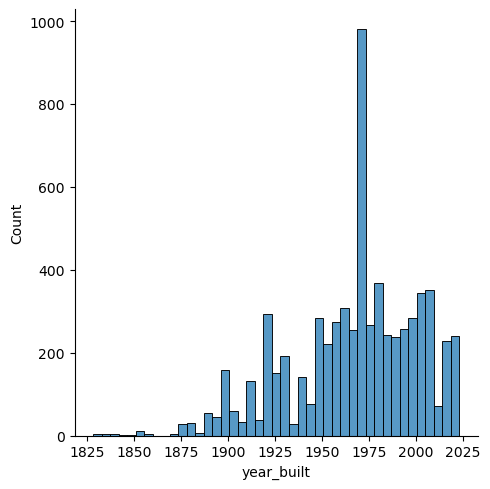

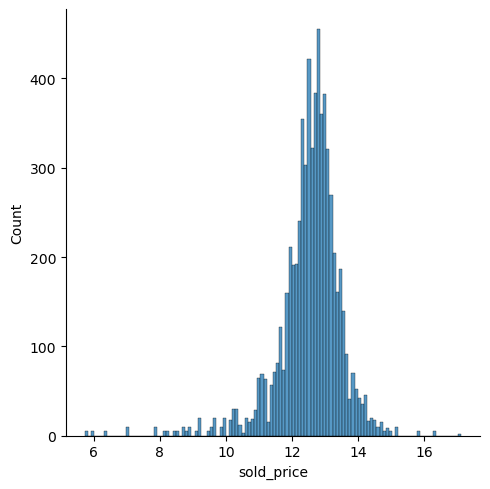

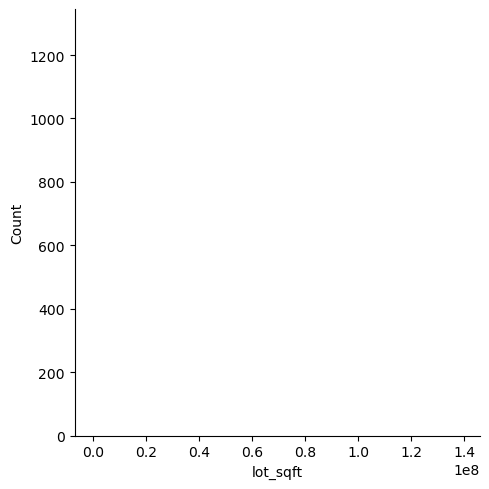

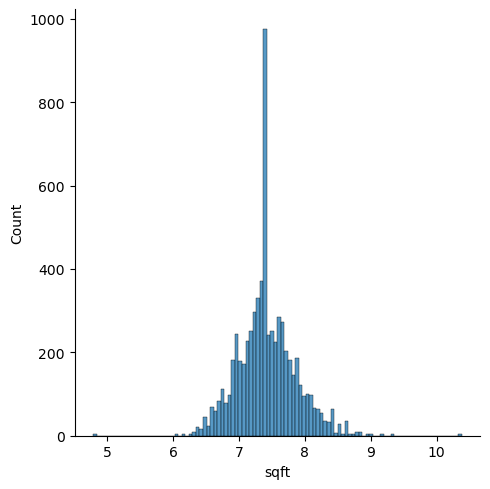

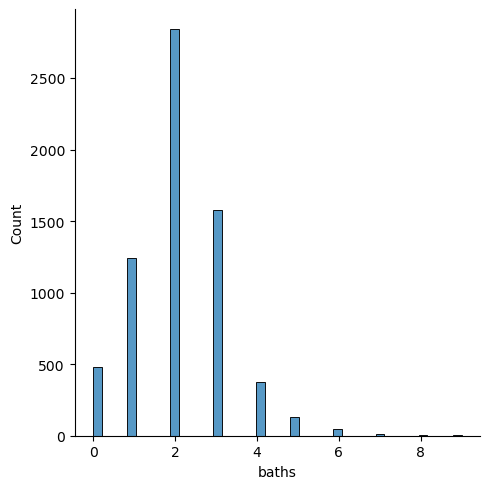

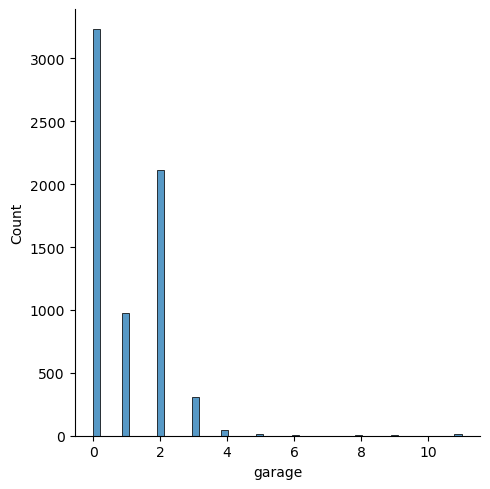

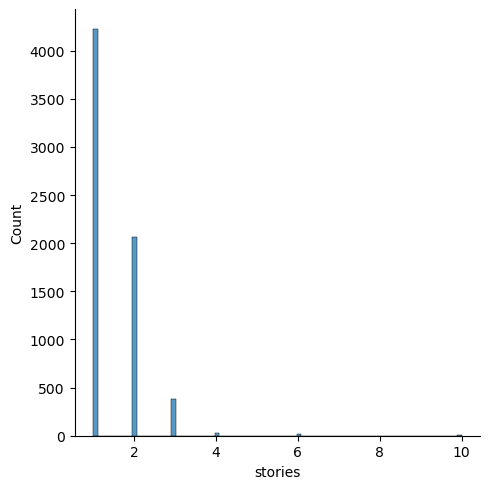

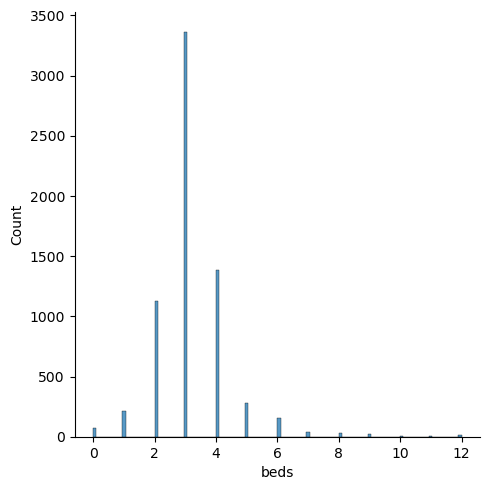

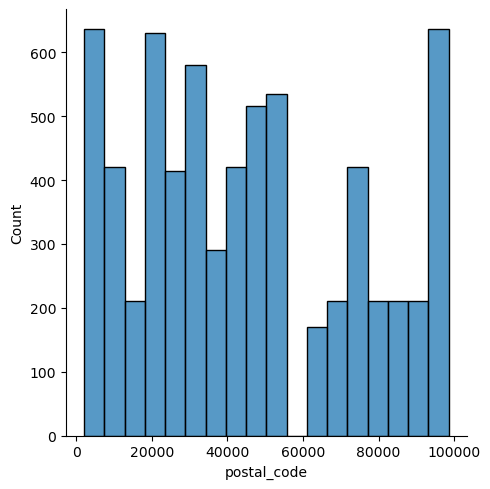

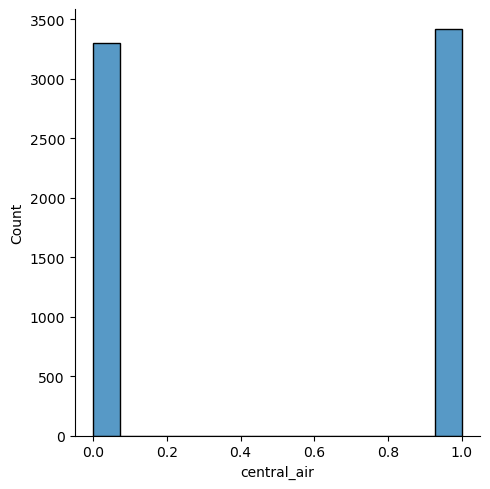

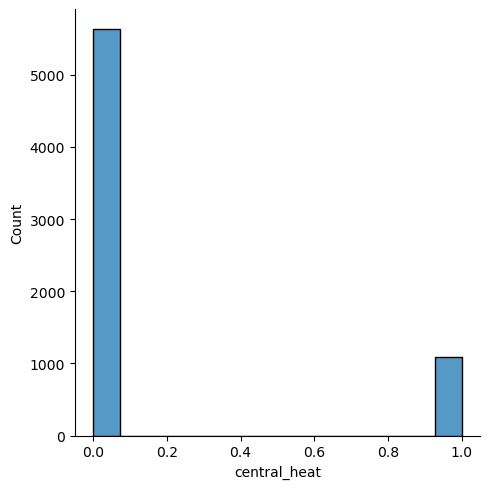

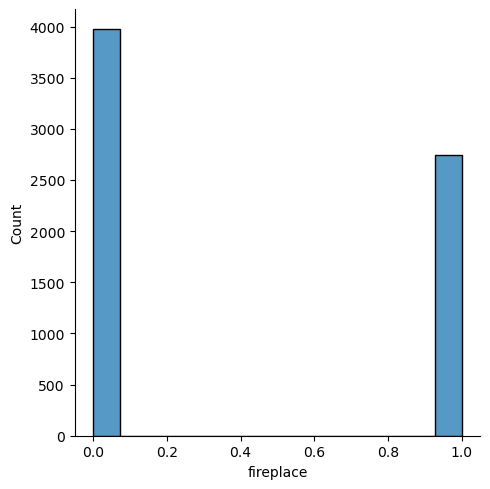

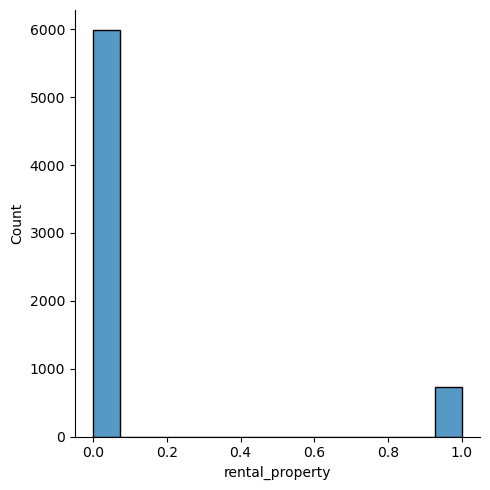

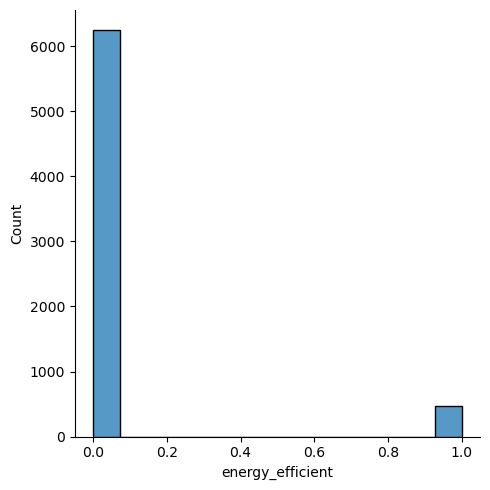

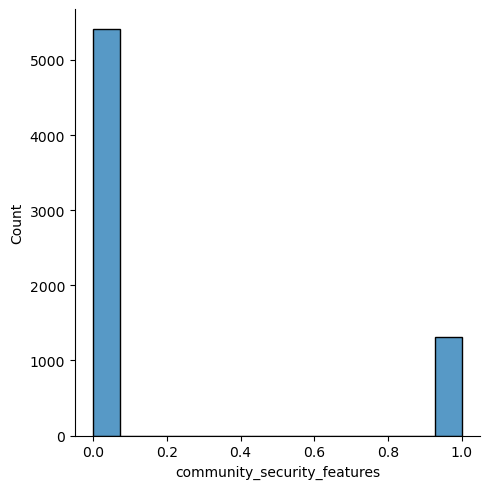

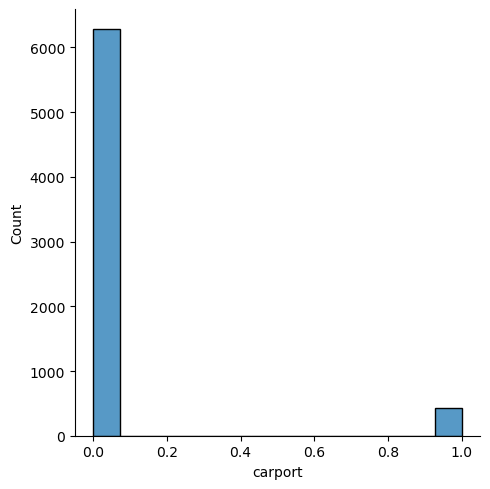

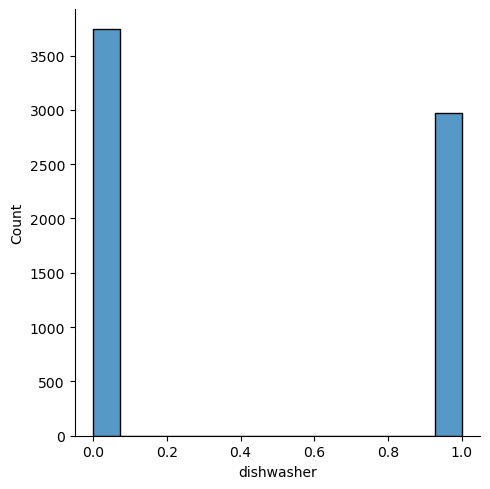

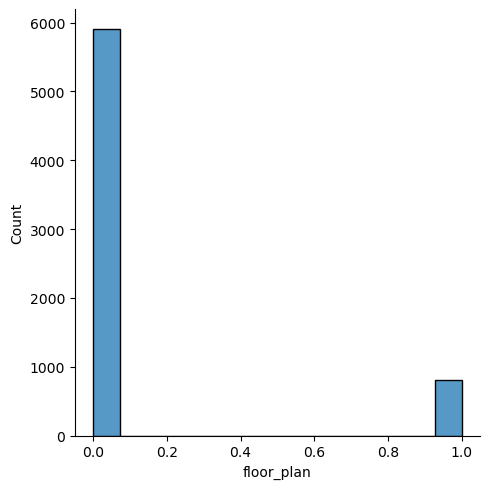

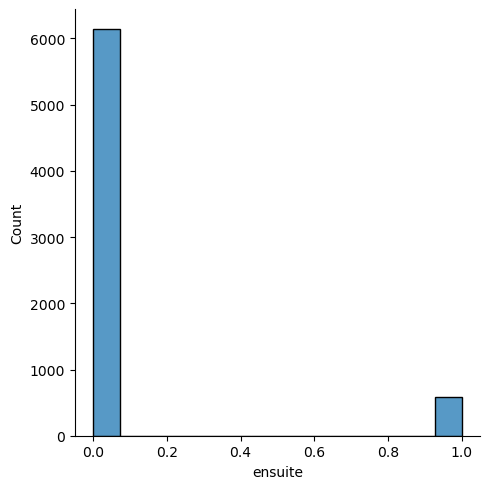

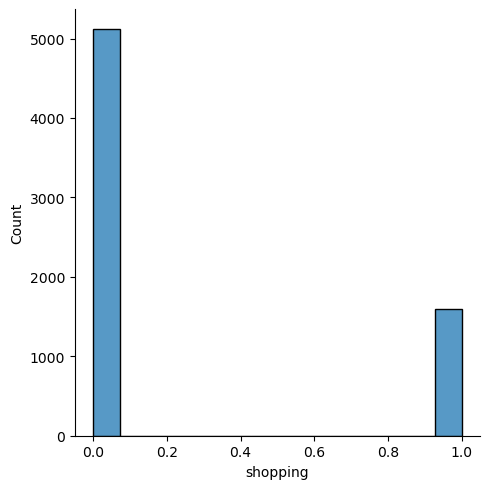

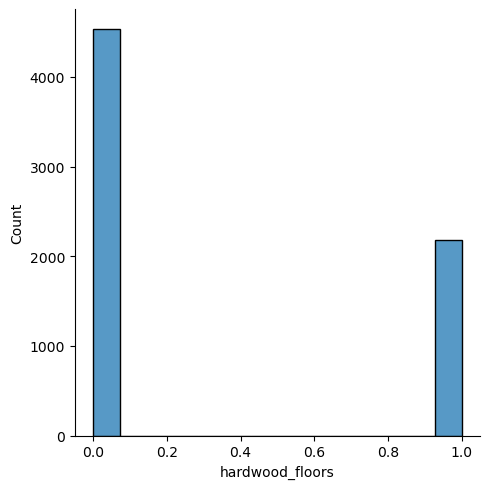

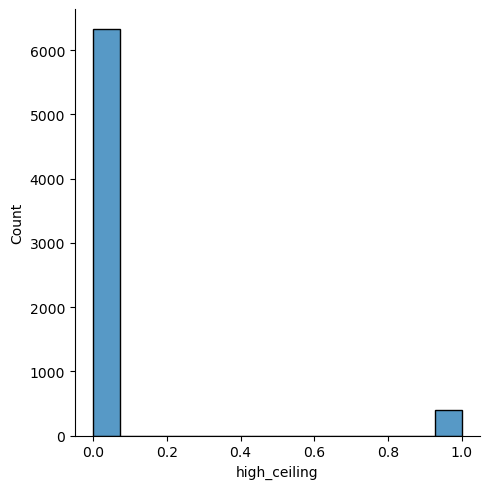

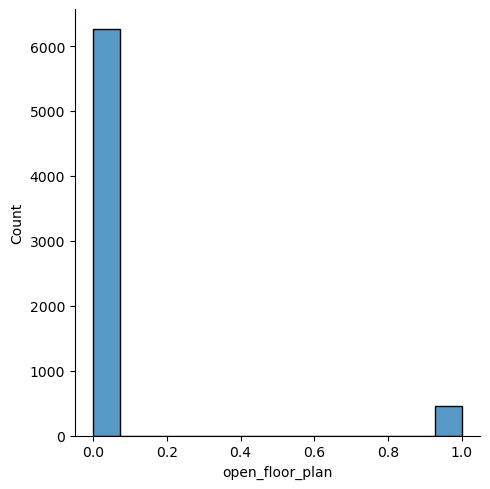

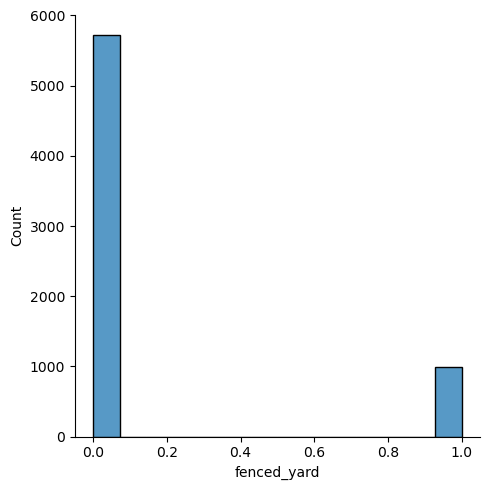

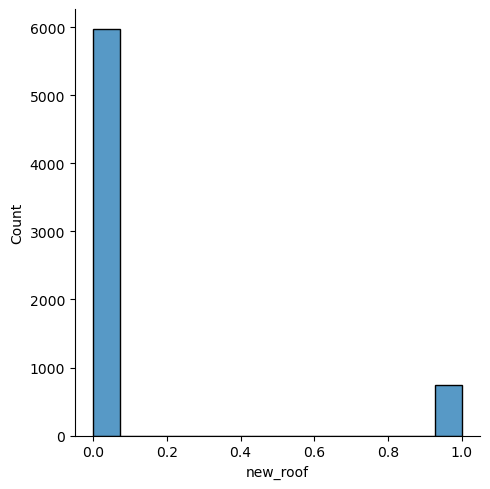

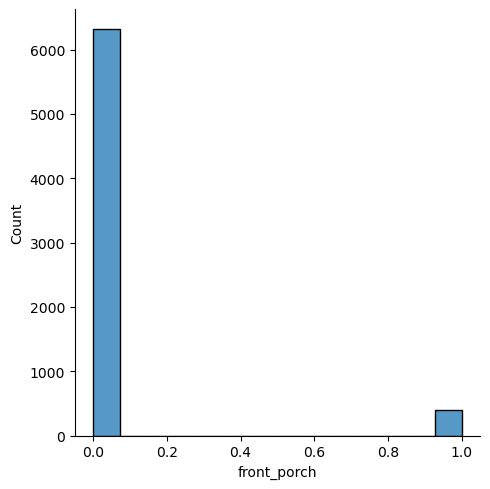

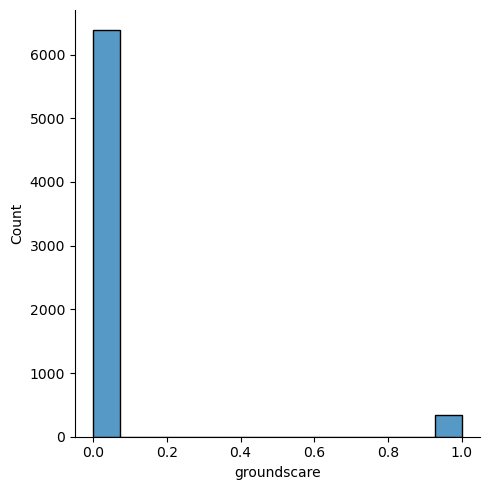

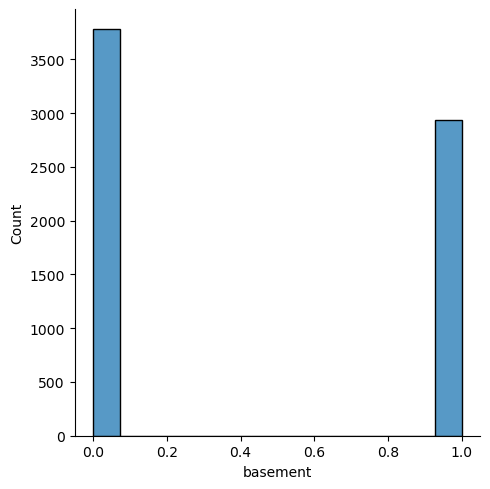

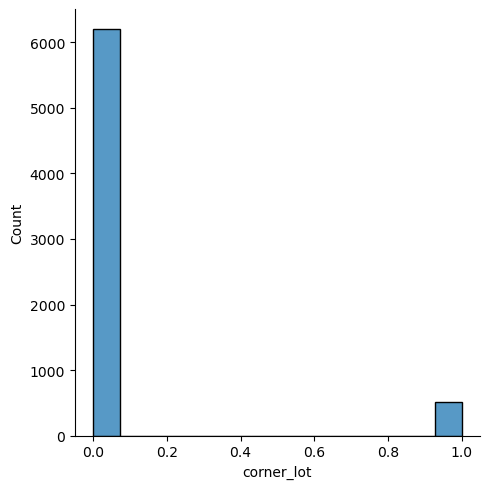

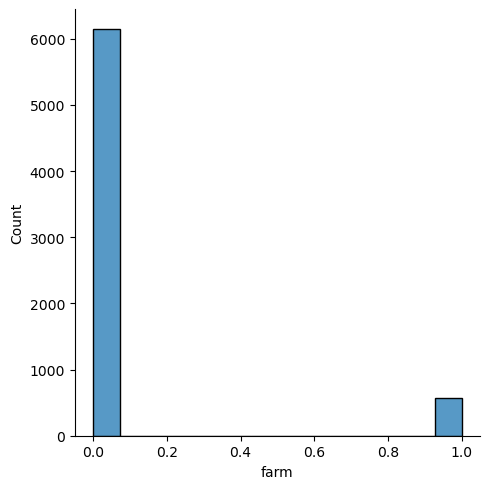

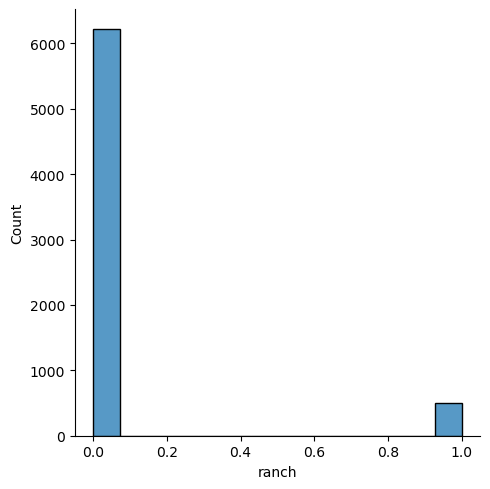

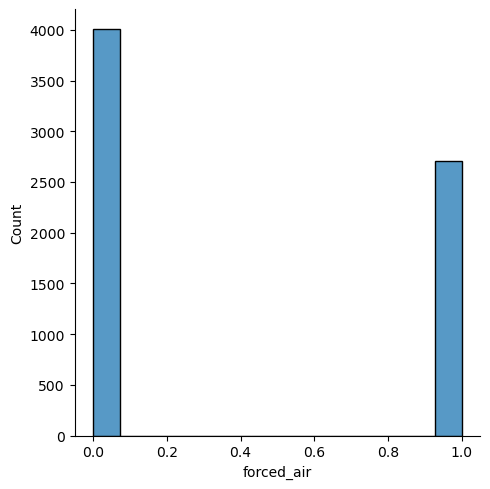

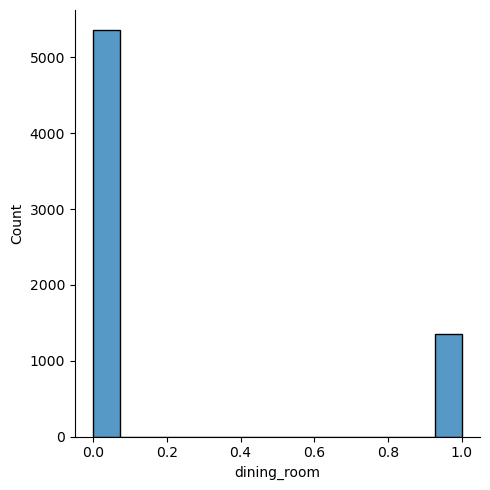

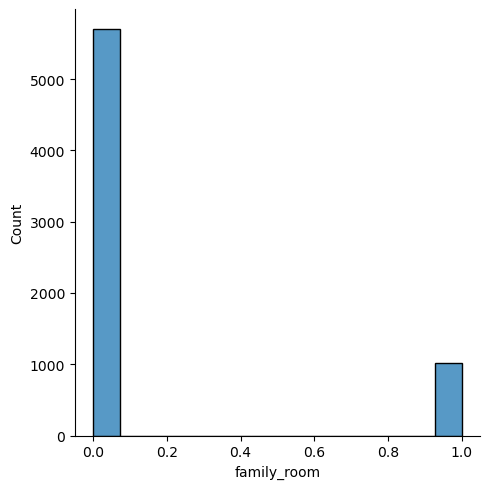

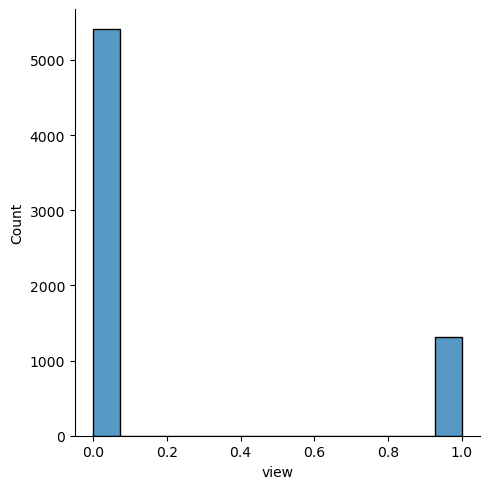

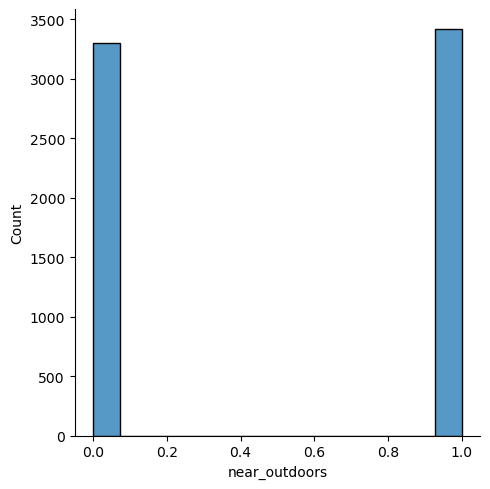

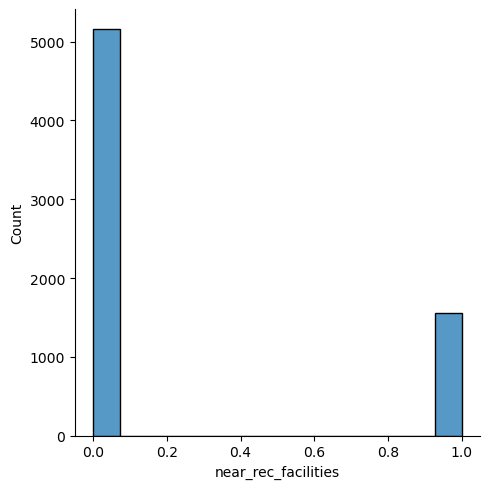

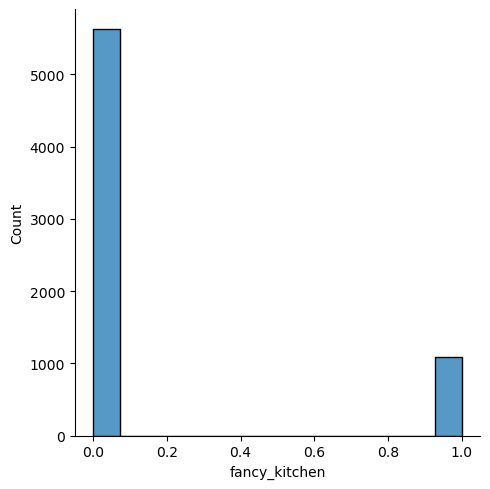

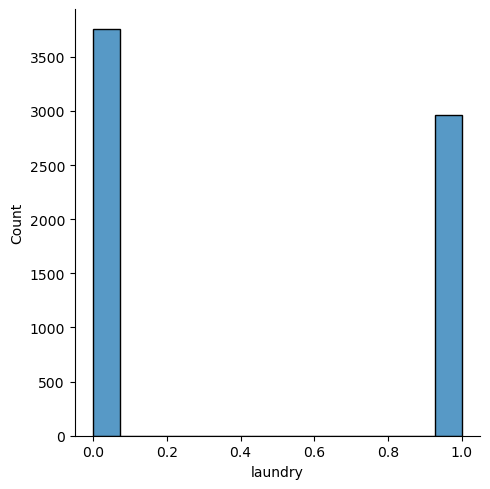

In [41]:
# By evaluating this distrubution, we can see that most of the columns are unevenly distrubuted. But that can't necessarily be attributed as outliers, since altering them might hugely affect the
# result. The only outliers considered were sold_price and sqft and those were normalized using logarithmic function
numbers = df.dtypes[df.dtypes != 'object'].index.tolist()

#we can plot all numeric columns for easy visualization
for column in numbers: 
    sns.displot(df[column])

In [5]:
#Before transforming anything, let's plot each variable on a line-chart in relation to sold_price
sold_price = df['sold_price']
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('sold_price')

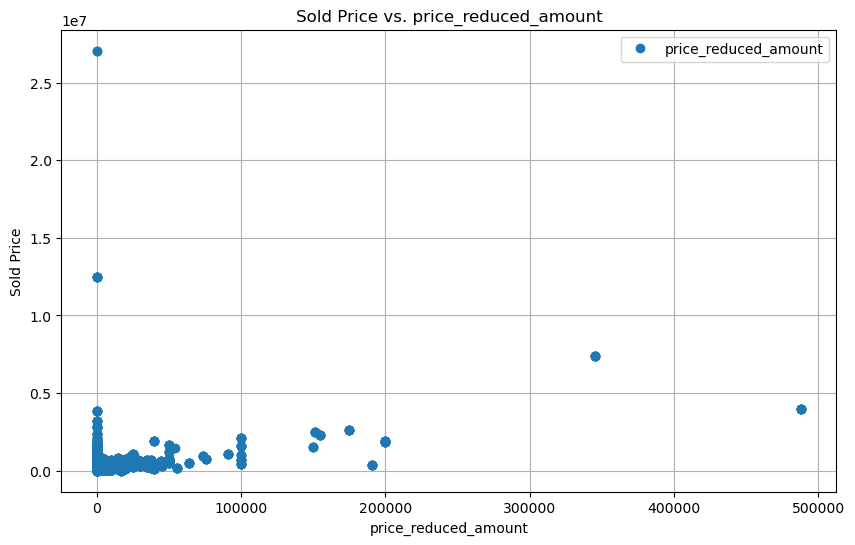

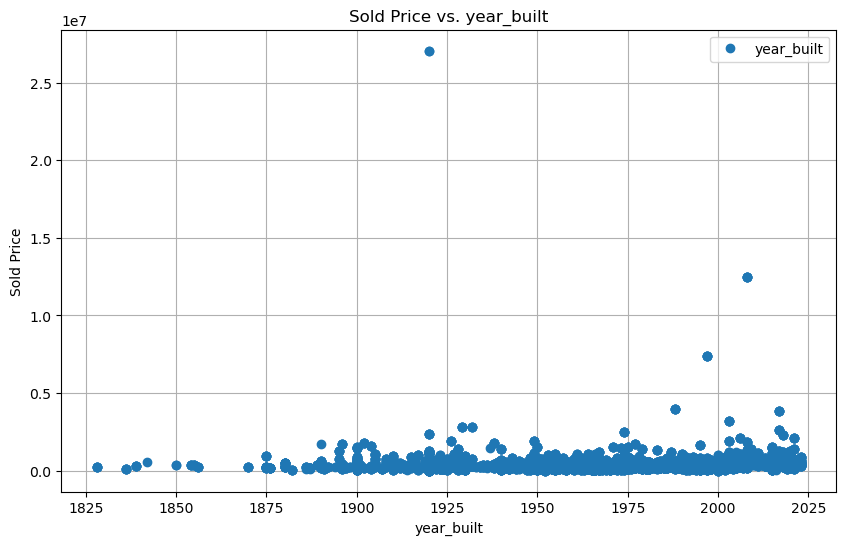

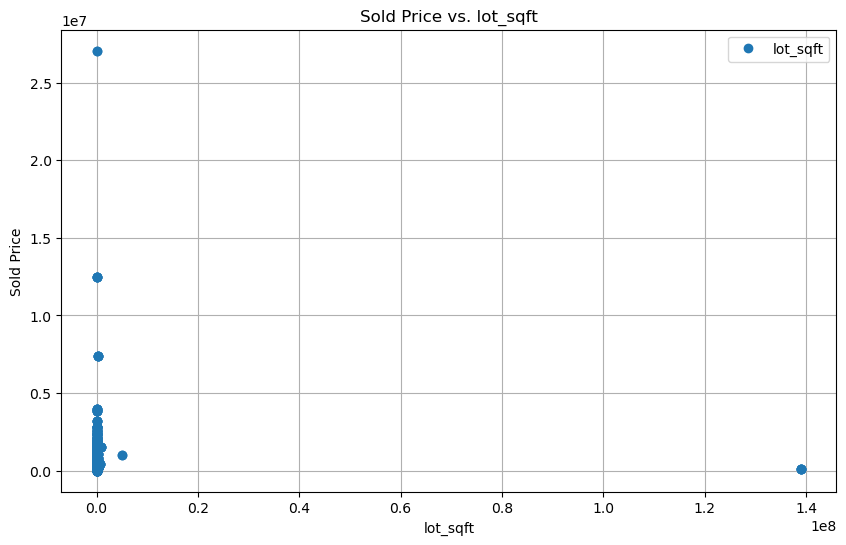

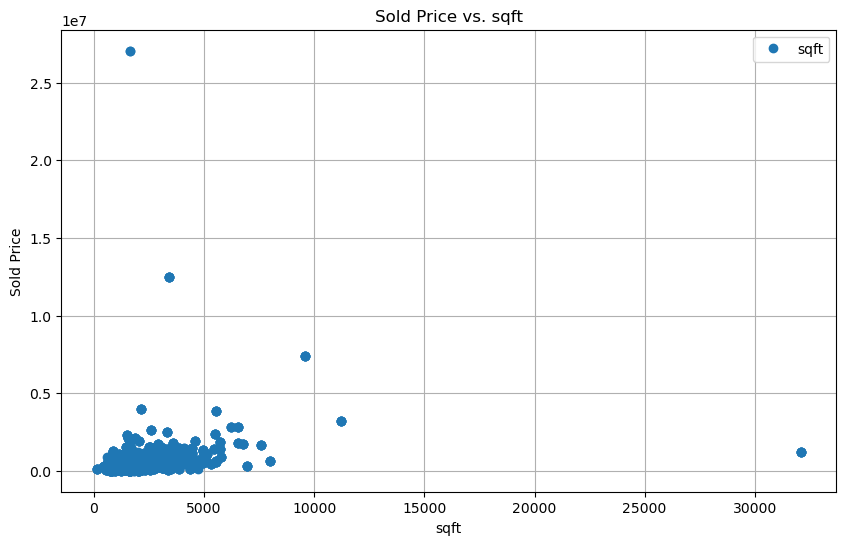

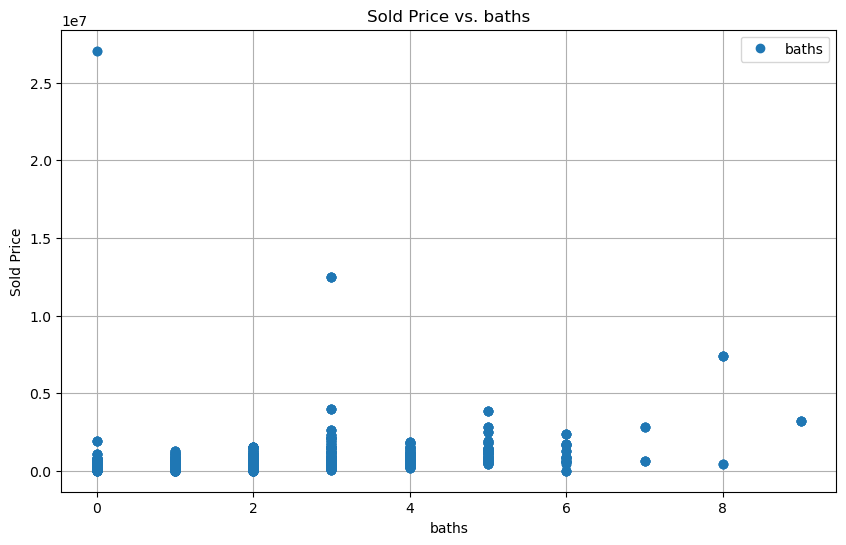

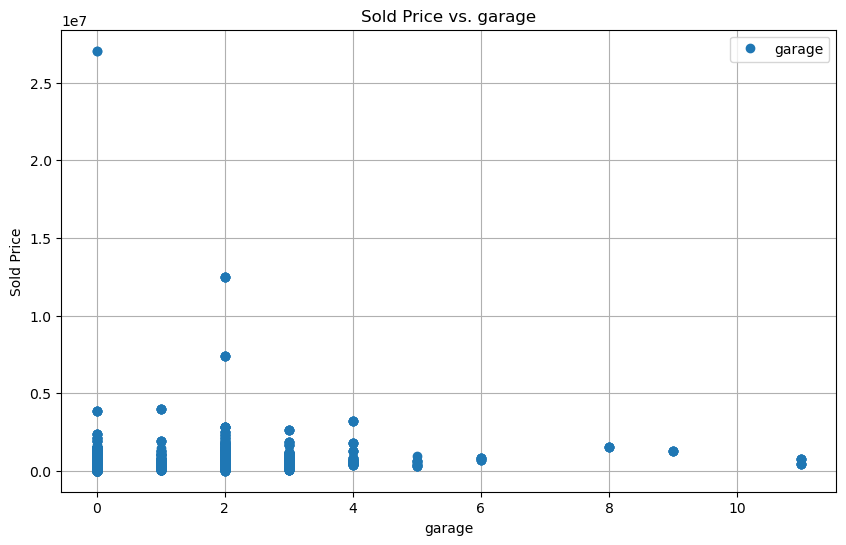

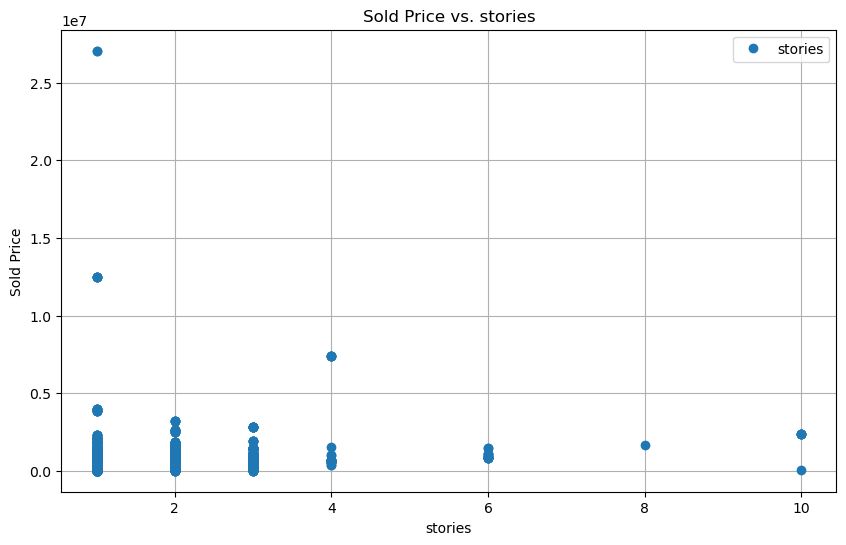

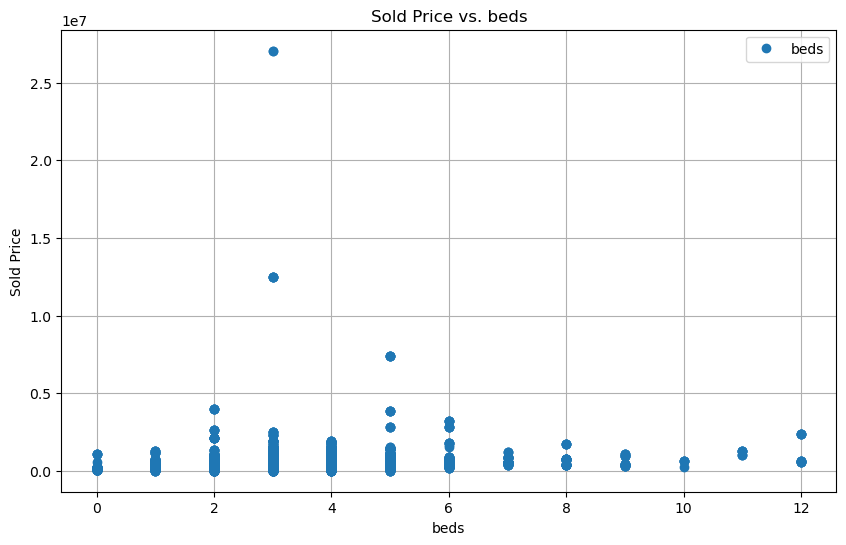

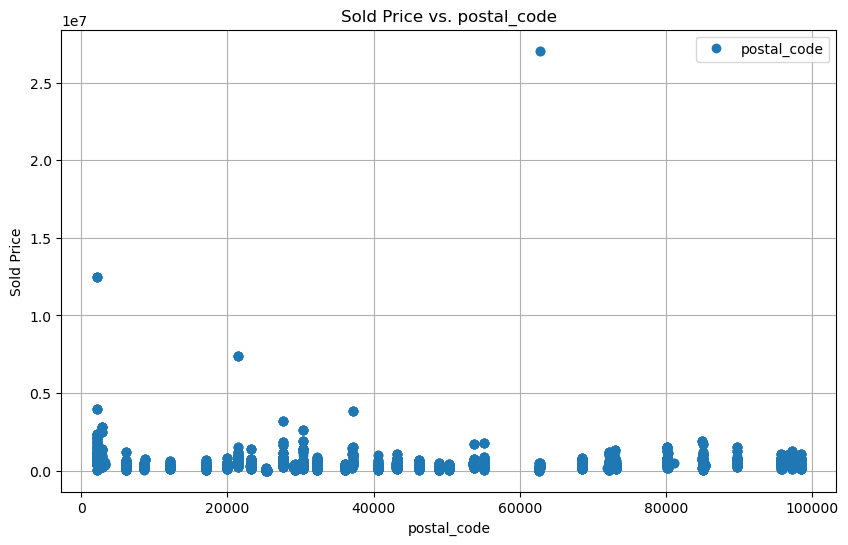

In [6]:
#looping through the numeric columns to create a line chart
for column in numeric_columns: 
    x_data = df[column]

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, sold_price, marker='o', linestyle='', label=f'{column}')
    plt.title(f'Sold Price vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Sold Price')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


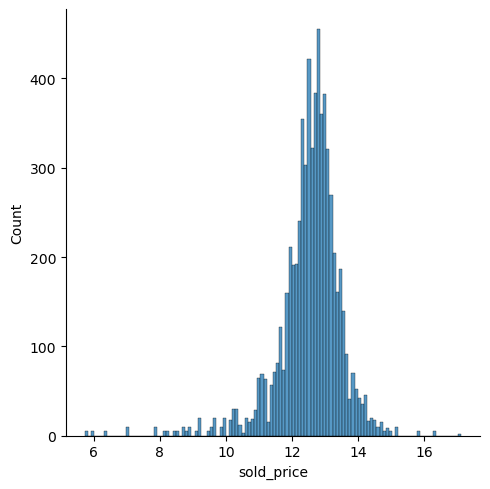

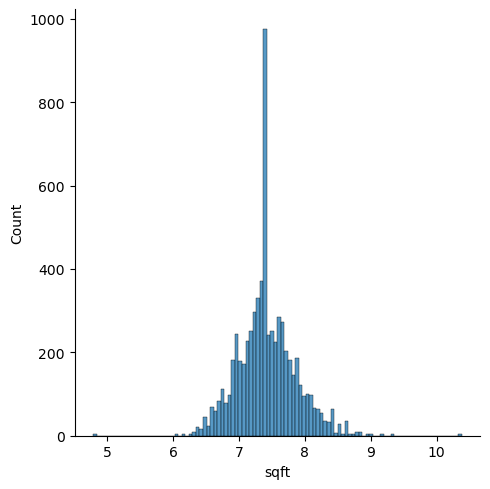

In [38]:
#let's transform skewed sold_price and sqft using log transformatin
df["sold_price"] = df["sold_price"].apply(np.log)
sns.displot(df["sold_price"])

df["sqft"] = df["sqft"].apply(np.log)
sns.displot(df["sqft"])

In [39]:
#After transforming, let's plot each variable on a line-chart in relation to sold_price
sold_price = df['sold_price']
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('sold_price')

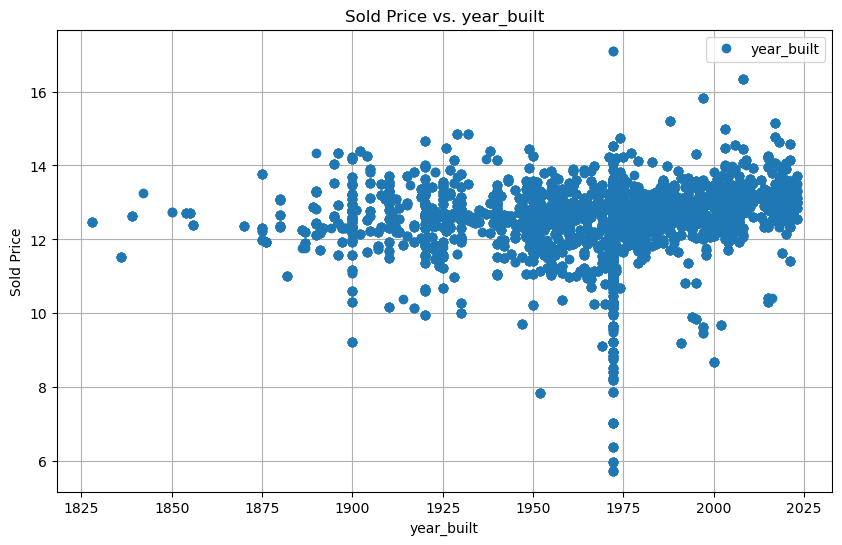

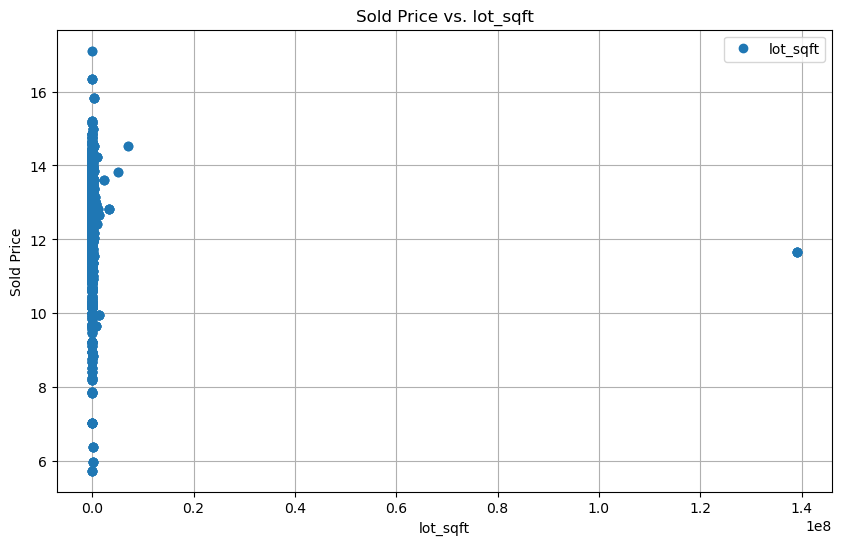

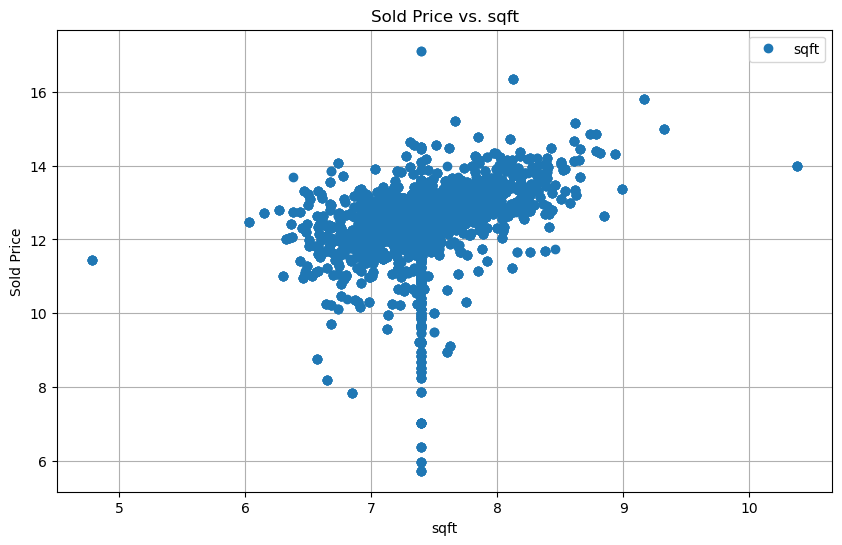

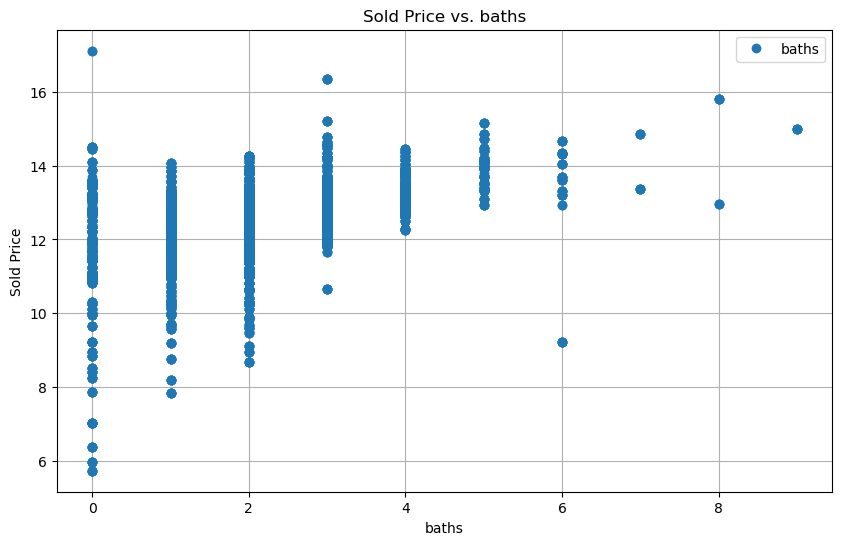

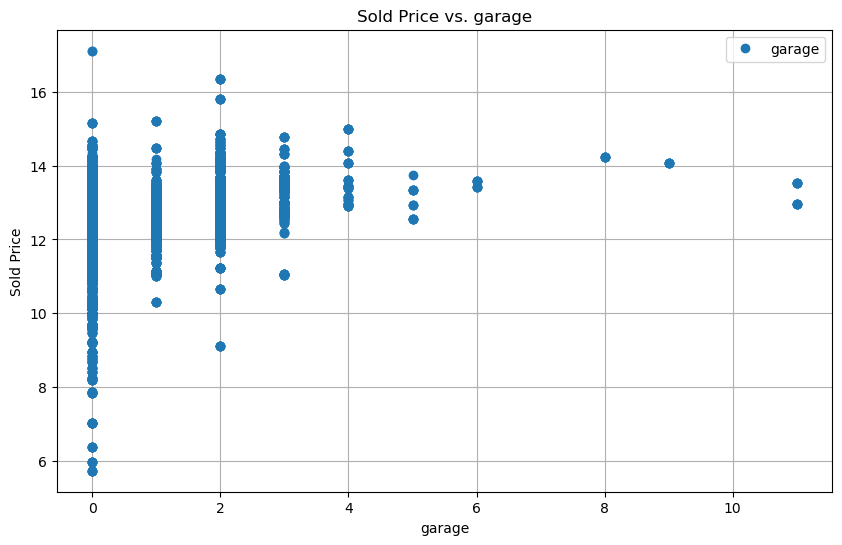

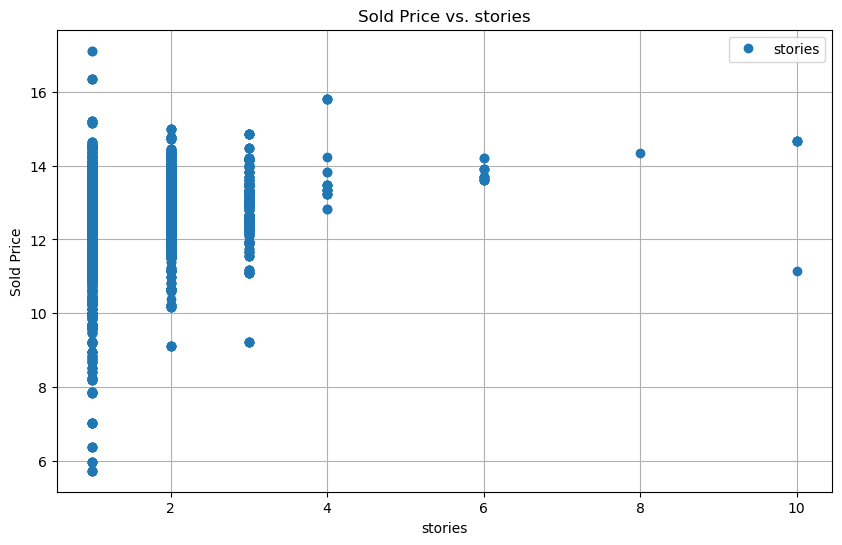

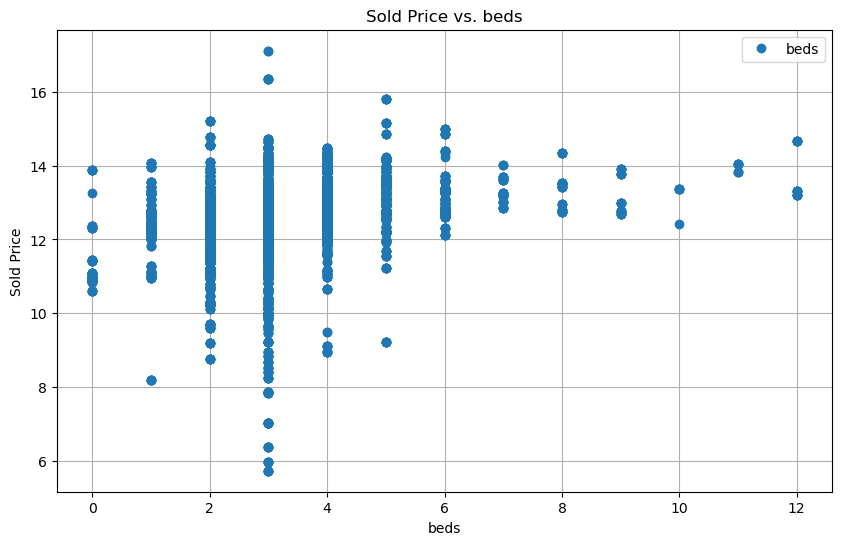

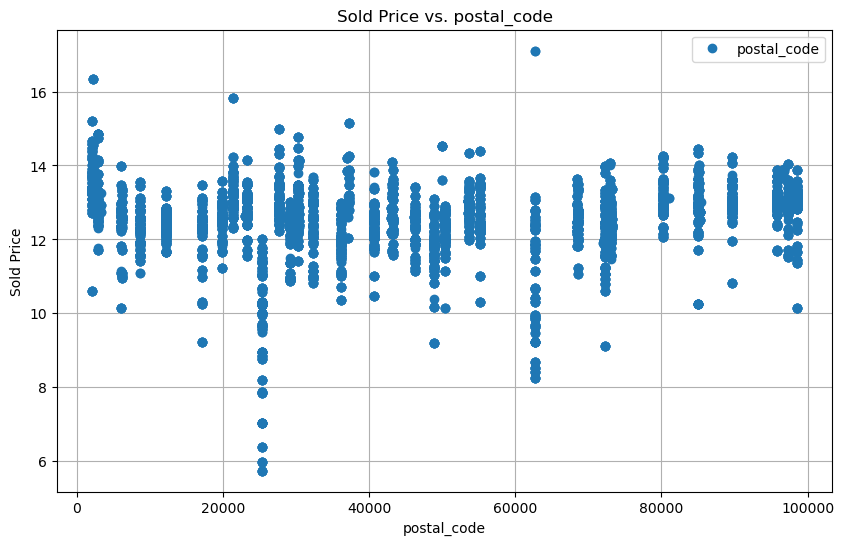

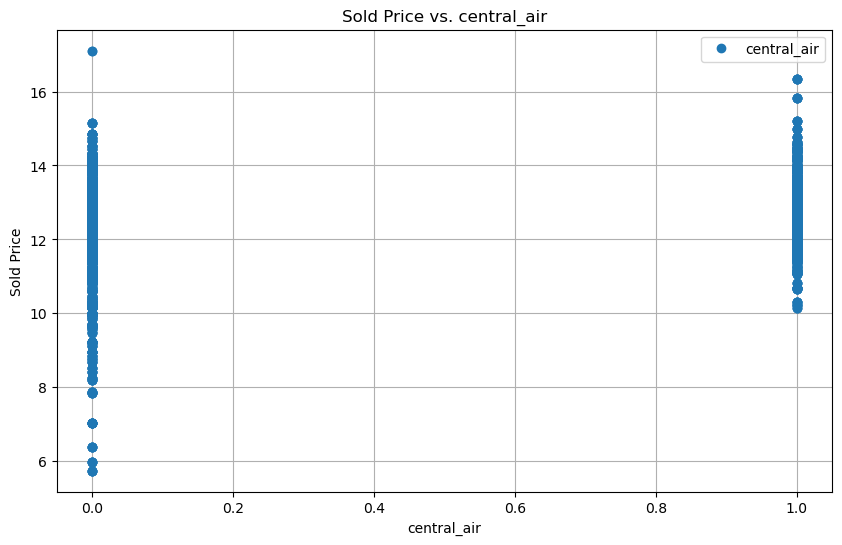

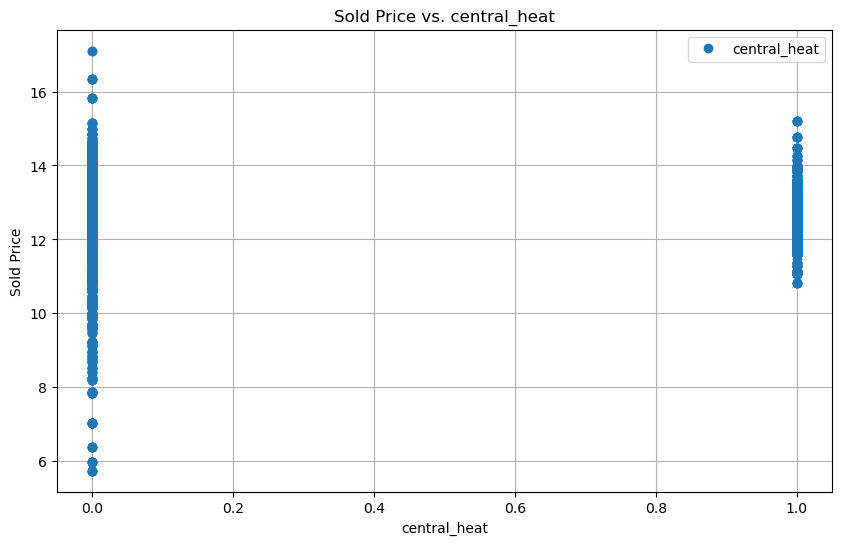

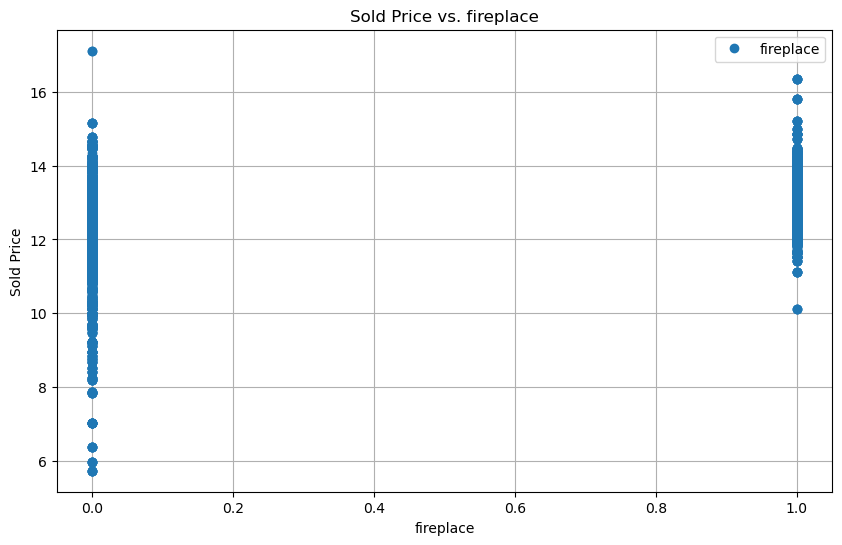

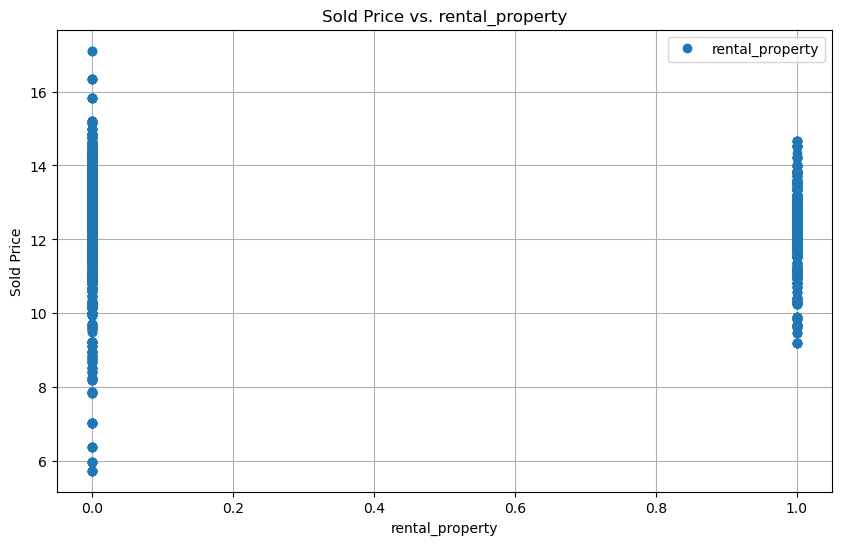

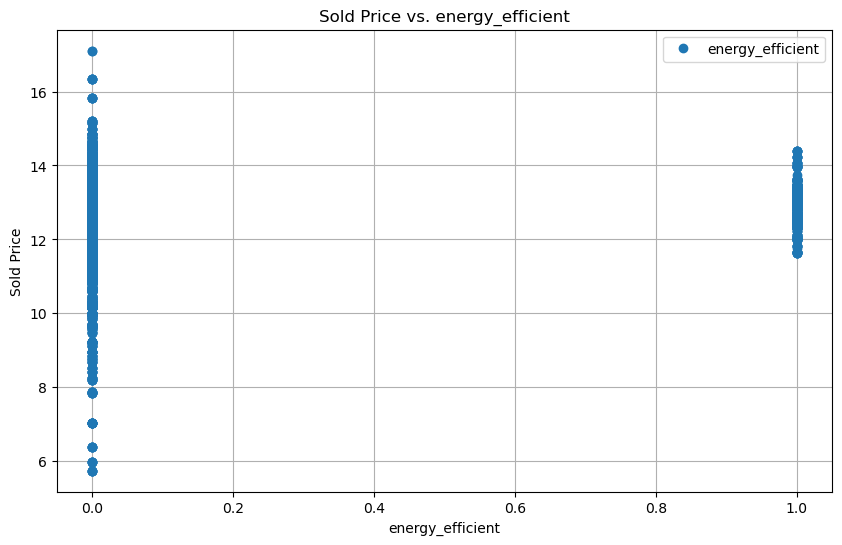

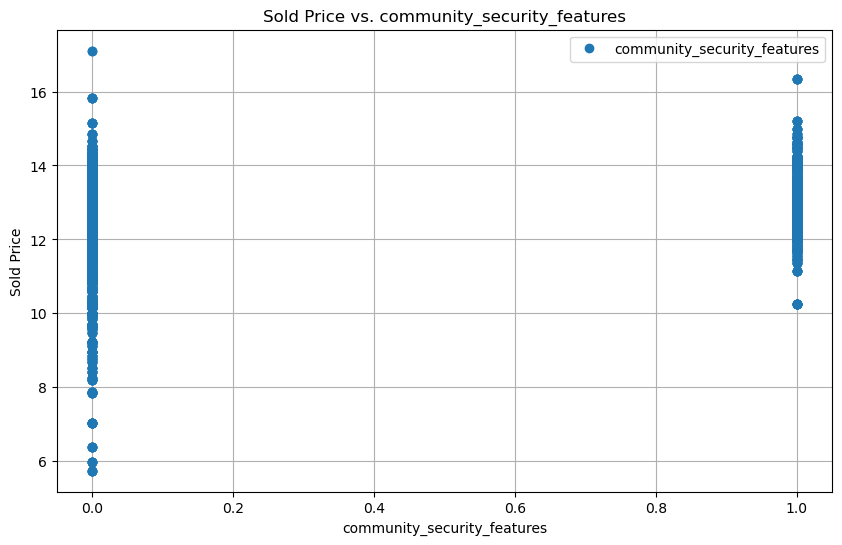

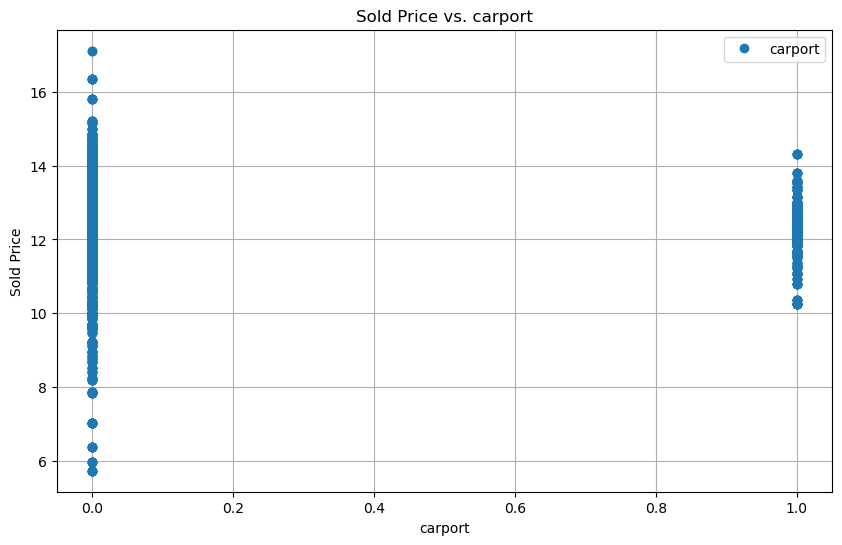

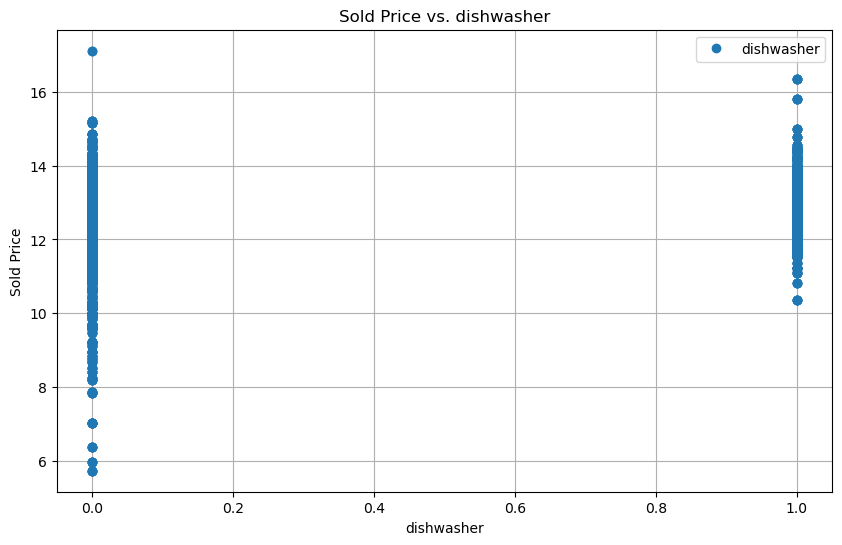

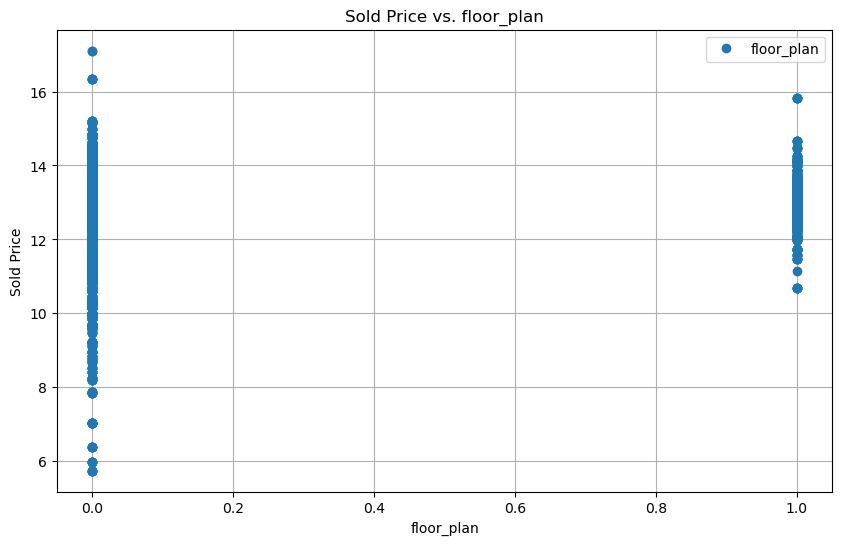

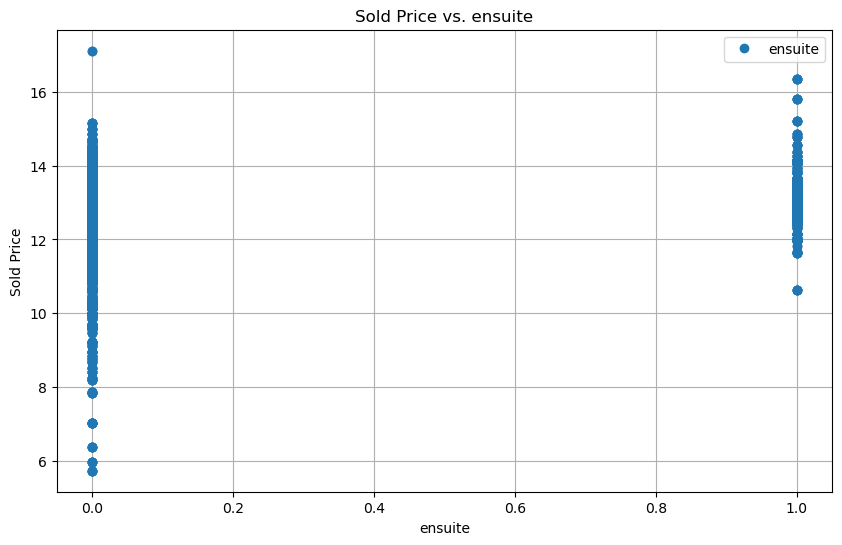

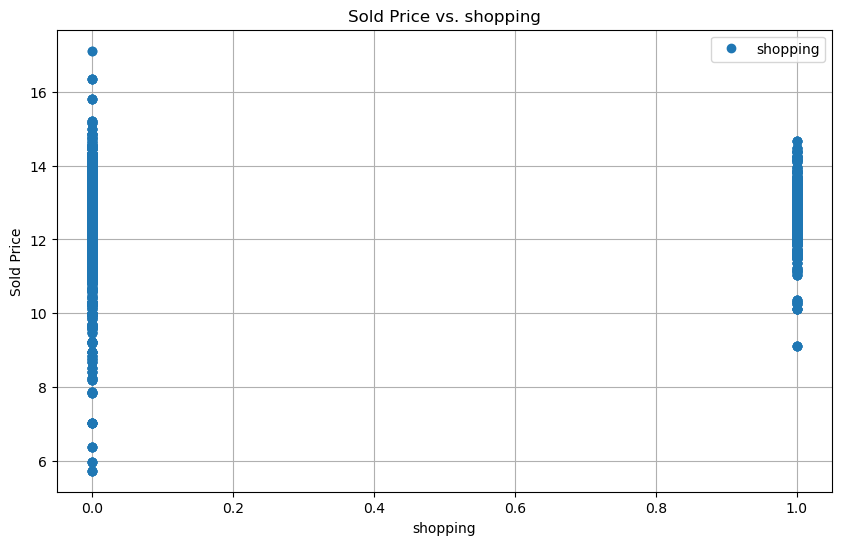

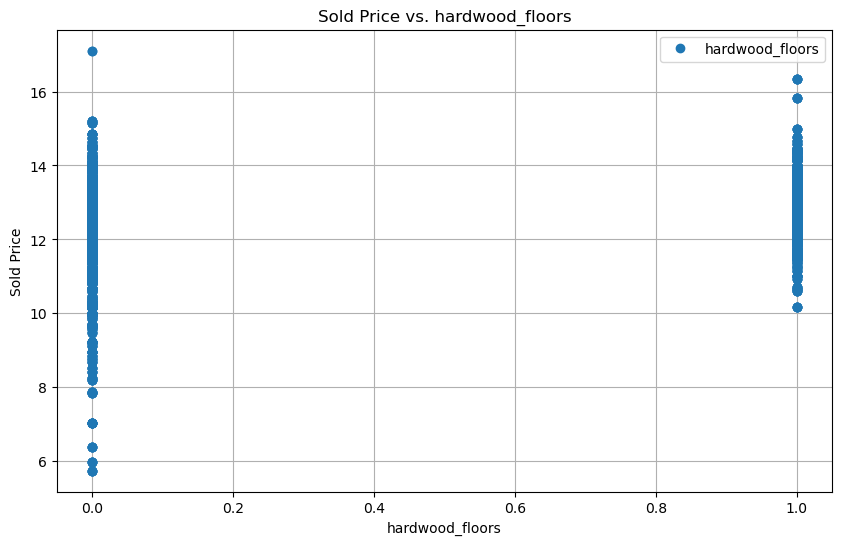

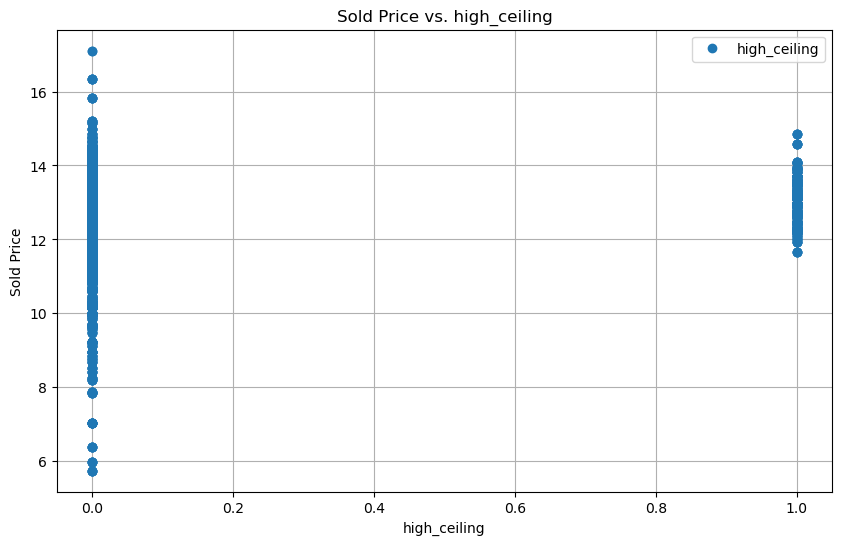

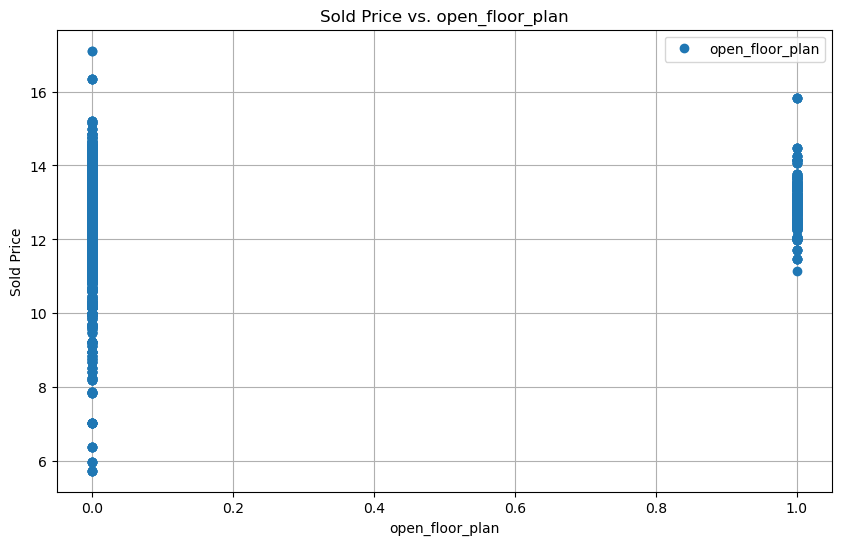

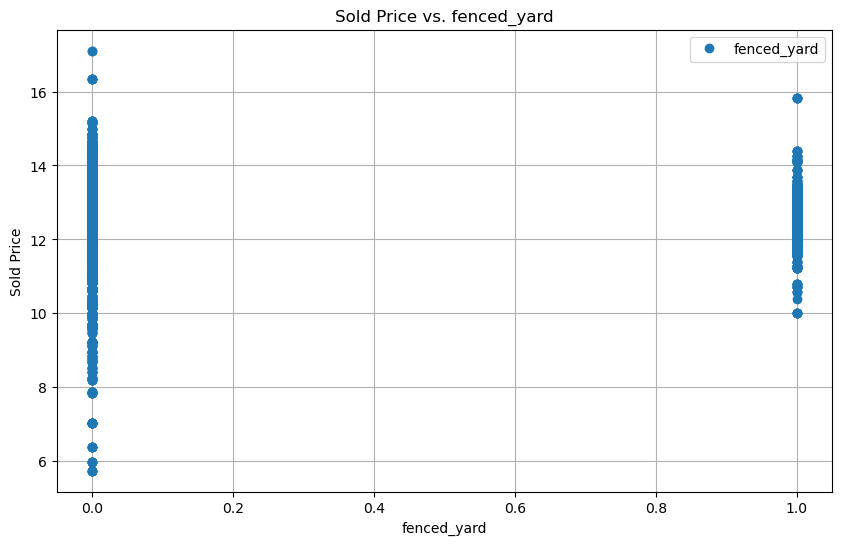

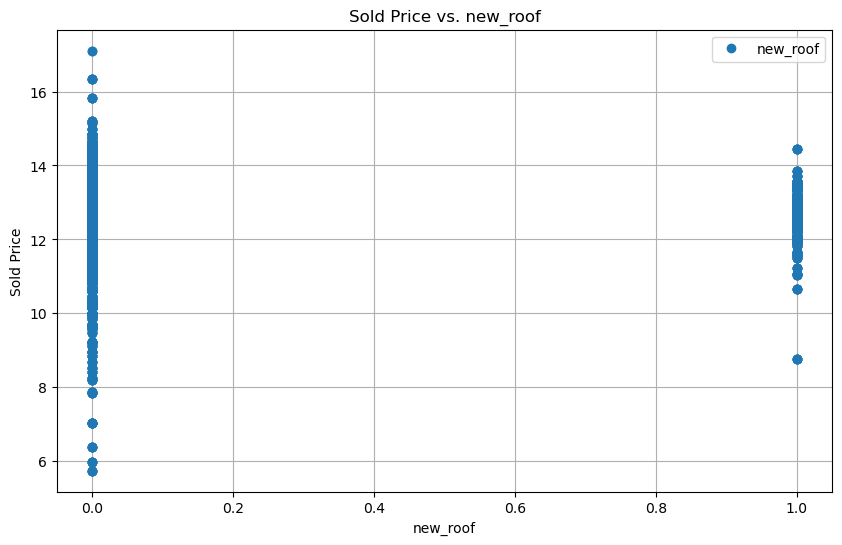

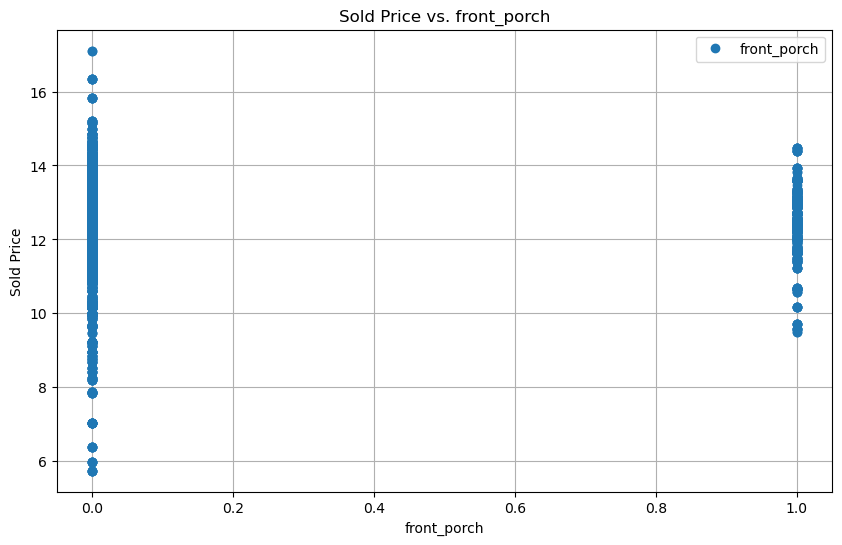

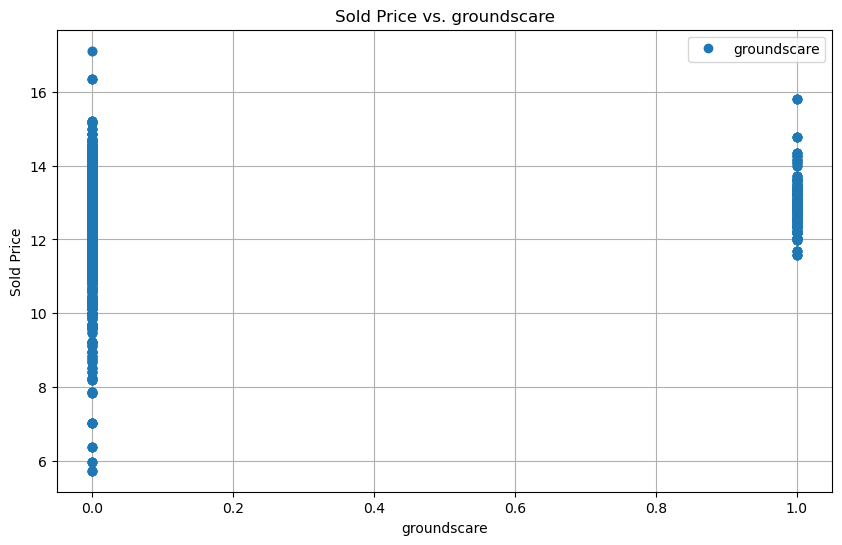

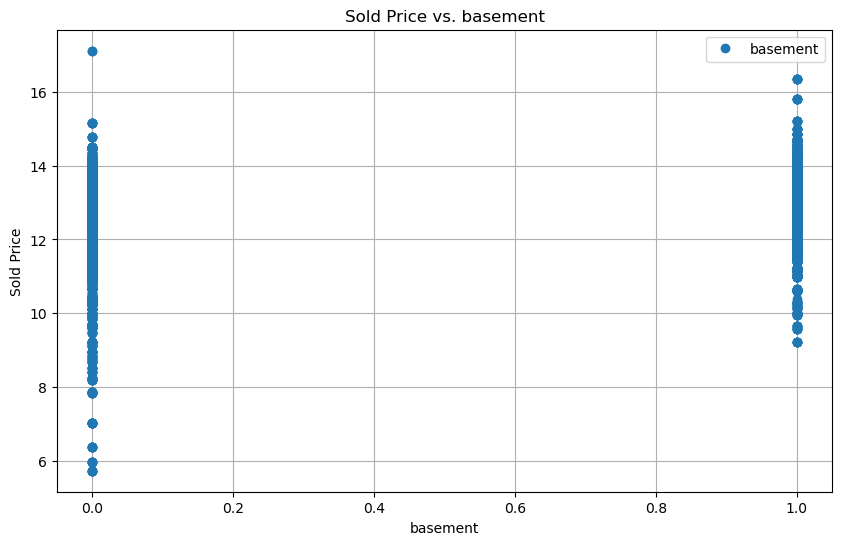

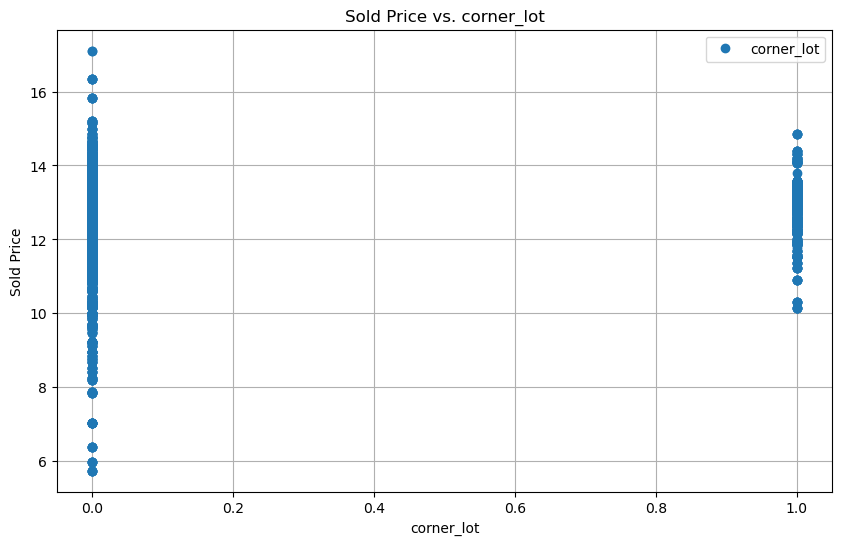

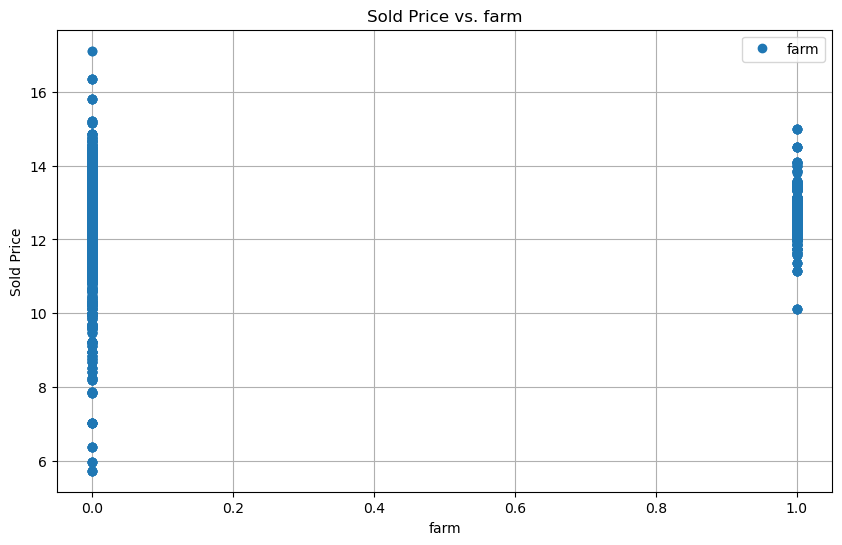

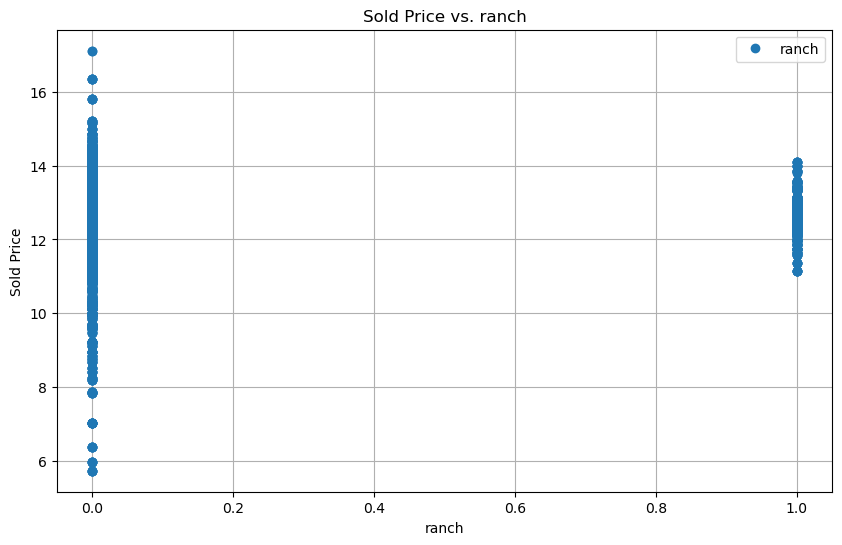

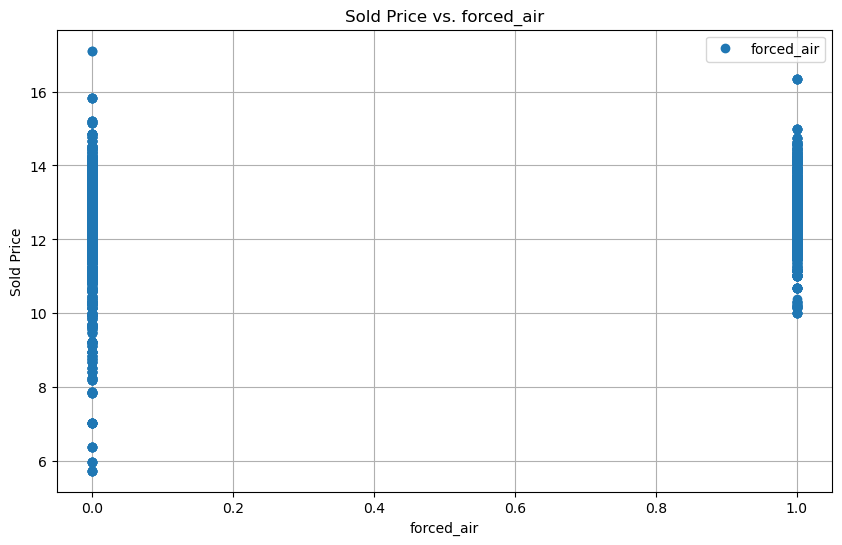

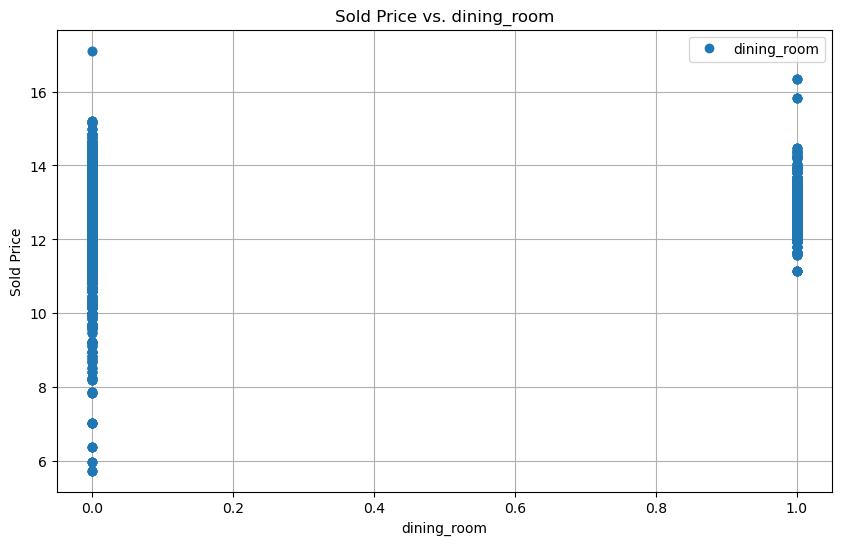

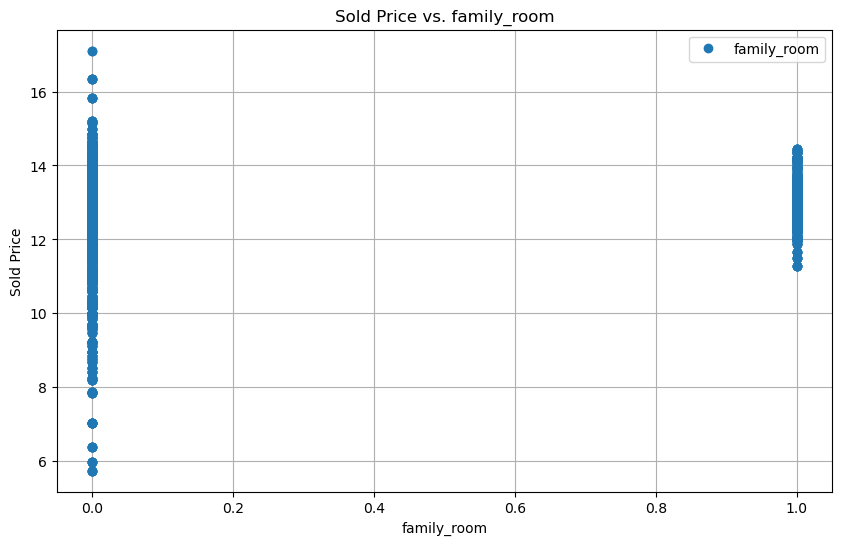

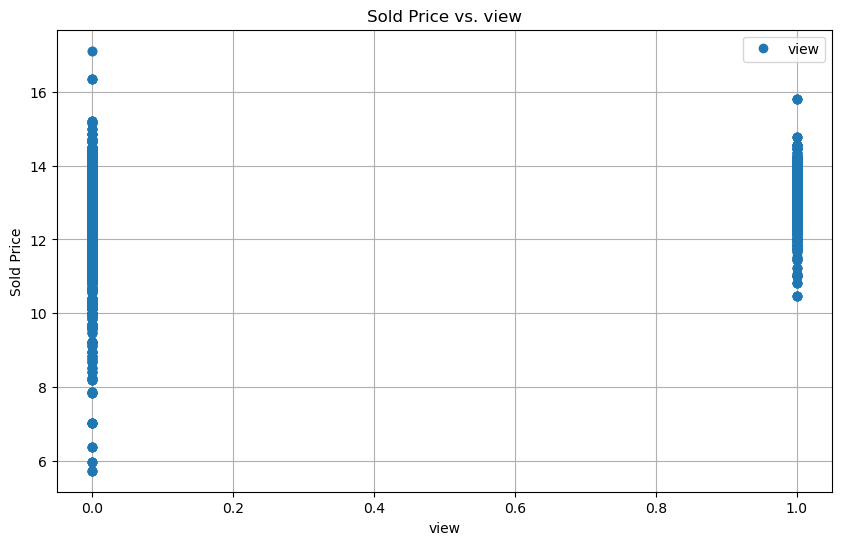

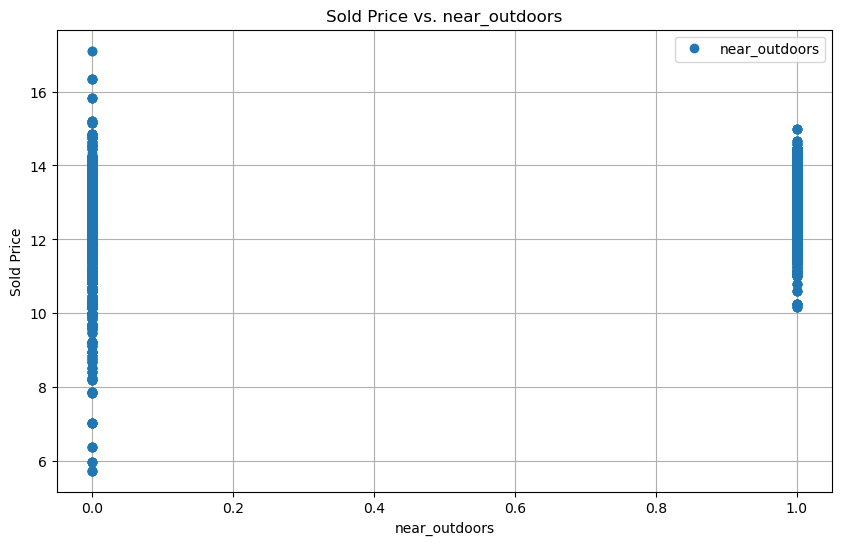

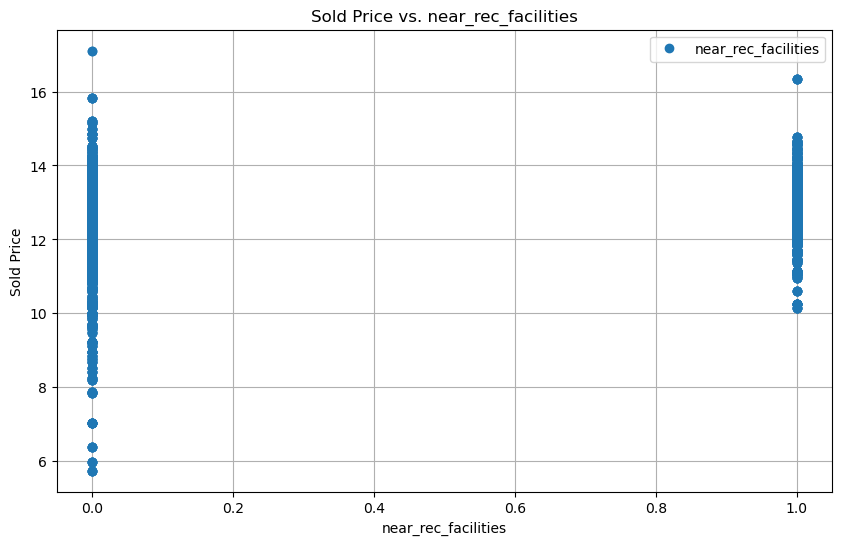

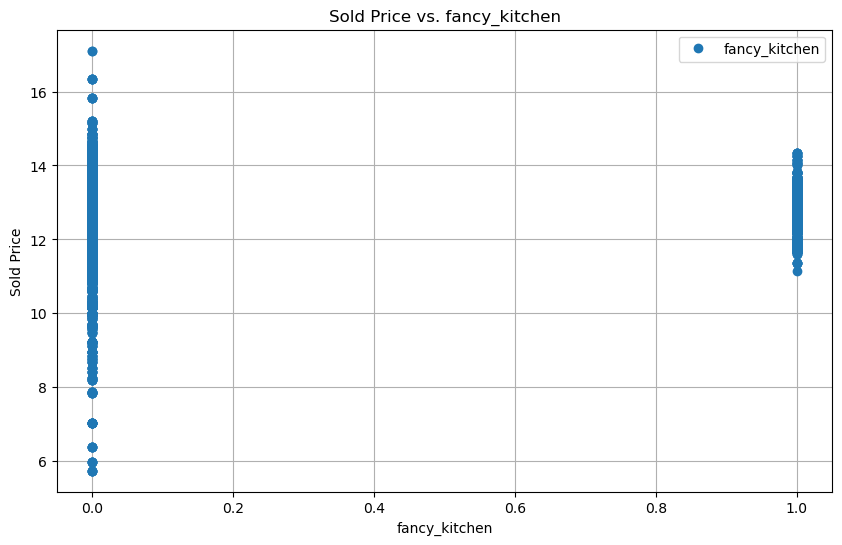

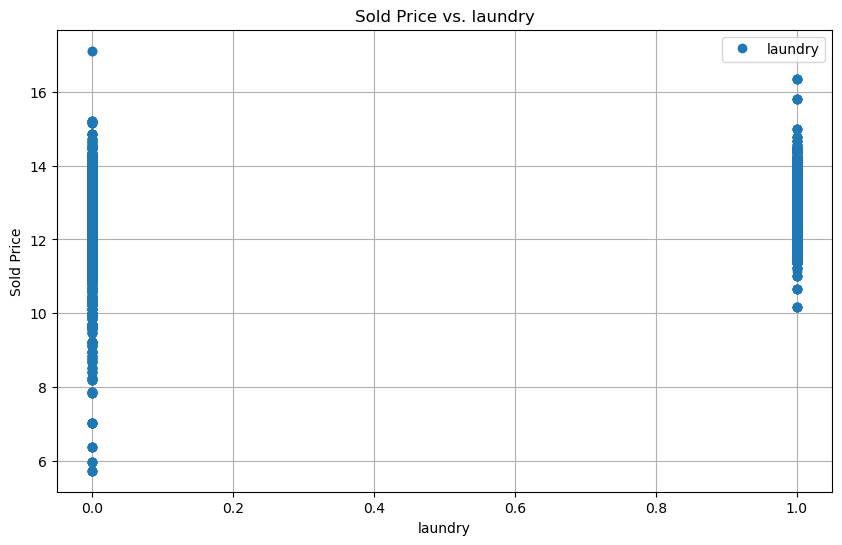

In [40]:
#looping through the numeric columns to create a line chart
for column in numeric_columns: 
    x_data = df[column]

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, sold_price, marker='o', linestyle='', label=f'{column}')
    plt.title(f'Sold Price vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Sold Price')
    plt.legend()
    plt.grid(True)
    plt.show()